## This notebook provide the instructions on how to read the DYAMOND GEOS data from the SealStorage using OpenVisus framework.

### To run this notebook properly, you need to install the library `OpenVisus`. To install this, please run the following command from your terminal:
`pip install OpenVisus`

# **Step 1: Importing the libraries**

In [1]:
import numpy as np
import OpenVisus as ov
import matplotlib.pyplot as plt
import os
os.environ['VISUS_CACHE']= "./visus_can_be_deleted"

### The section below shows different GEOS fields we have available in cloud. Remember that GEOS fields are projected in a cubed-sphere grid; so they have 6 faces 

### set the variable and face

In [2]:
variable = 'u'
face=2
timestep=1

In [3]:
geos_face_loc=f"https://nsdf-climate3-origin.nationalresearchplatform.org:50098/nasa/nsdf/climate3/dyamond/GEOS/GEOS_{variable.upper()}/{variable.lower()}_face_{face}_depth_52_time_0_10269.idx"


## **Step 2: Reading the metadata file from cloud**
In this section, you can select any variables that you can declared in the cells above and replace it inside `LoadDataset`. We are just reading the metadata for the dataset here.

In [4]:
db=ov.LoadDataset(geos_face_loc)
print(f'Dimensions: {db.getLogicBox()[1][0]}*{db.getLogicBox()[1][1]}*{db.getLogicBox()[1][2]}')
print(f'Total Timesteps: {len(db.getTimesteps())}')
print(f'Field: {db.getField().name}')
print('Data Type: float32')

Dimensions: 1440*1440*52
Total Timesteps: 10269
Field: u
Data Type: float32


## **Step 3:  Data Selection**
This section shows you how to load the data you want. You can select any timestep, region (x,y,z) you want. You can set the quality or resolution of the data as well. Higher quality means the finer(more) data. Not setting any time means first timestep available. Not setting quality means full data which takes a while to load because of the higher filesize. 

In [5]:
data=db.read(time=99,quality=-4,z=[50,51]) 
data.shape

(1, 360, 360)

## **Step 4:  Visualize the data**
We are using a simple matplotlib here, but since the data is in numpy array, it can loaded with any python modules that support numpy. Feel free to set the `vmin`,`vmax` appropriately.

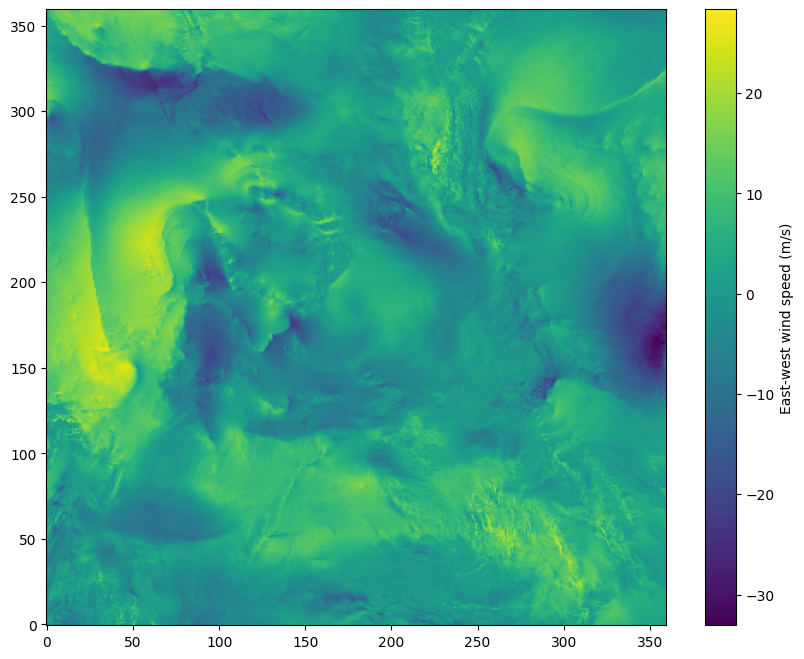

In [6]:
fig,axes=plt.subplots(1,1,figsize=(10,8))

im=axes.imshow(data[0,:,:], aspect='auto',origin='lower',cmap='viridis')
cbar = plt.colorbar(im, ax=axes)
cbar.set_label('East-west wind speed (m/s)')
plt.show()

# **Step 7: Horizontal Slicing**

In [7]:
data1=db.read(time=99,y=[1000,1001])
data1.shape


(52, 1, 1440)

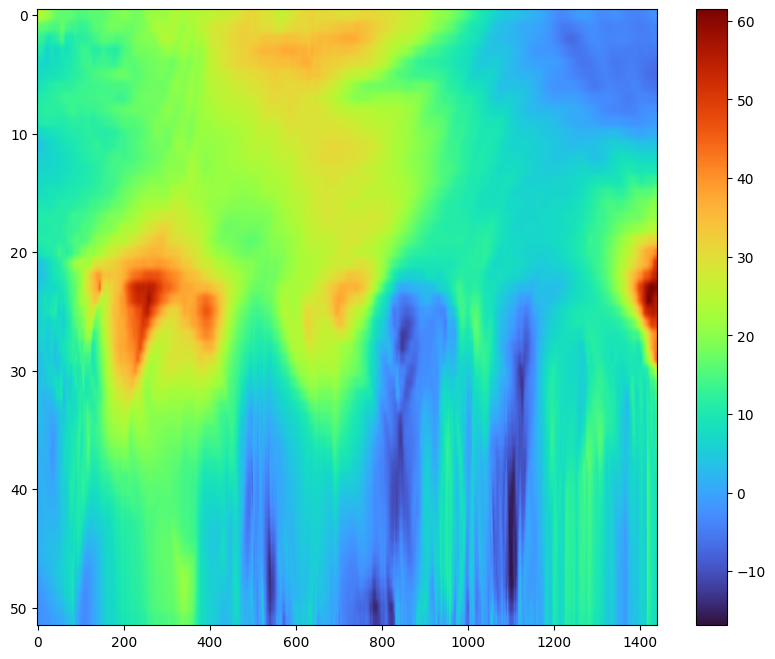

In [8]:
plt.figure(figsize=(10,8))
plt.imshow(data1[:,0,:],cmap='turbo', aspect='auto')
plt.colorbar()

### *Please reach out to Aashish Panta, Giorgio Scorzelli or Valerio Pascucci for any concerns about the notebook. Thank you!*
- Aashish Panta (aashishpanta0@gmail.com)
- Giorgio Scorzelli (scrgiorgio@gmail.com)
- Valerio Pascucci (pascucci.valerio@gmail.com)